In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
import re
import pycountry
import openpyxl
import seaborn as sns
import numpy as np

ocde = [
    'Australia',
    'Austria',
    'Belgium',
    'Canada',
    'Chile',
    'Colombia',
    'Costa Rica',
    'Czechia',
    'Denmark',
    'Estonia',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Iceland',
    'Ireland',
    'Israel',
    'Italy',
    'Japan',
    'South Korea',
    'Latvia',
    'Lithuania',
    'Luxembourg',
    'Mexico',
    'Netherlands',
    'New Zealand',
    'Norway',
    'Poland',
    'Portugal',
    'Slovakia',
    'Slovenia',
    'Spain',
    'Sweden',
    'Switzerland',
    'Türkiye',
    'United Kingdom',
    'United States'
]

In [36]:
len(ocde)

38

In [37]:
mt = pd.read_parquet('../data/analyzed/fb/FB_K^4_X_by_country.parquet')
mt_nr = pd.read_parquet('../data/analyzed/fb/FB_newrel_K^4_X_by_country.parquet')
mt_nr_na = pd.read_parquet('../data/analyzed/fb/FB_newrel_newage_K^4_X_by_country.parquet')

In [38]:
mt = mt.reset_index(drop=True)
mt_nr = mt_nr.reset_index(drop=True)
mt_nr_na = mt_nr_na.reset_index(drop=True)

In [39]:
temp = pd.merge(mt,mt_nr, on='country', suffixes=('_mt', '_nr'))
exclude_column = 'country'
mt_nr_na = mt_nr_na.rename(columns=lambda col: col + '_nr_na' if col != exclude_column else col)
platforms_merged = pd.merge(temp,mt_nr_na, on='country')

platforms_merged.rename(columns = {'K^4_90_mt': r'$K^4_{90} MT$', 'K^4_90_nr': r'$K^4_{90} NR$', 'K^4_90_nr_na': r'$K^4_{90} NR+NA$',
                                    'K^4_95_mt': r'$K^4_{95} MT$', 'K^4_95_nr': r'$K^4_{95} NR$', 'K^4_95_nr_na': r'$K^4_{95} NR+NA$',
                                    'K^4_99_mt': r'$K^4_{99} MT$', 'K^4_99_nr': r'$K^4_{99} NR$', 'K^4_99_nr_na': r'$K^4_{99} NR+NA$'
                                    }, inplace=True)

platforms_merged.rename(columns = {'RK^4_90_mt': r'$RK^4_{90} MT$', 'RK^4_90_nr': r'$RK^4_{90} NR$', 'RK^4_90_nr_na': r'$RK^4_{90} NR+NA$',
                                    'RK^4_95_mt': r'$RK^4_{95} MT$', 'RK^4_95_nr': r'$RK^4_{95} NR$', 'RK^4_95_nr_na': r'$RK^4_{95} NR+NA$',
                                    'RK^4_99_mt': r'$RK^4_{99} MT$', 'RK^4_99_nr': r'$RK^4_{99} NR$', 'RK^4_99_nr_na': r'$RK^4_{99} NR+NA$'
                                    }, inplace=True)

platforms_merged = platforms_merged.reindex(sorted(platforms_merged.columns), axis=1)
platforms_merged[['country', r'$RK^4_{90} MT$', r'$RK^4_{90} NR$', r'$RK^4_{90} NR+NA$']]

,country,$RK^4_{90} MT$,$RK^4_{90} NR$,$RK^4_{90} NR+NA$
0,AD,0.032,0.265,1.903
1,AE,0.085,0.125,2.013
2,AF,0.178,0.181,1.903
3,AG,0.033,0.263,1.518
4,AL,0.074,0.078,1.396
...,...,...,...,...
224,YE,0.125,0.170,2.376
225,YT,0.031,0.314,1.235
226,ZA,0.082,0.118,1.810
227,ZM,0.069,0.138,1.458


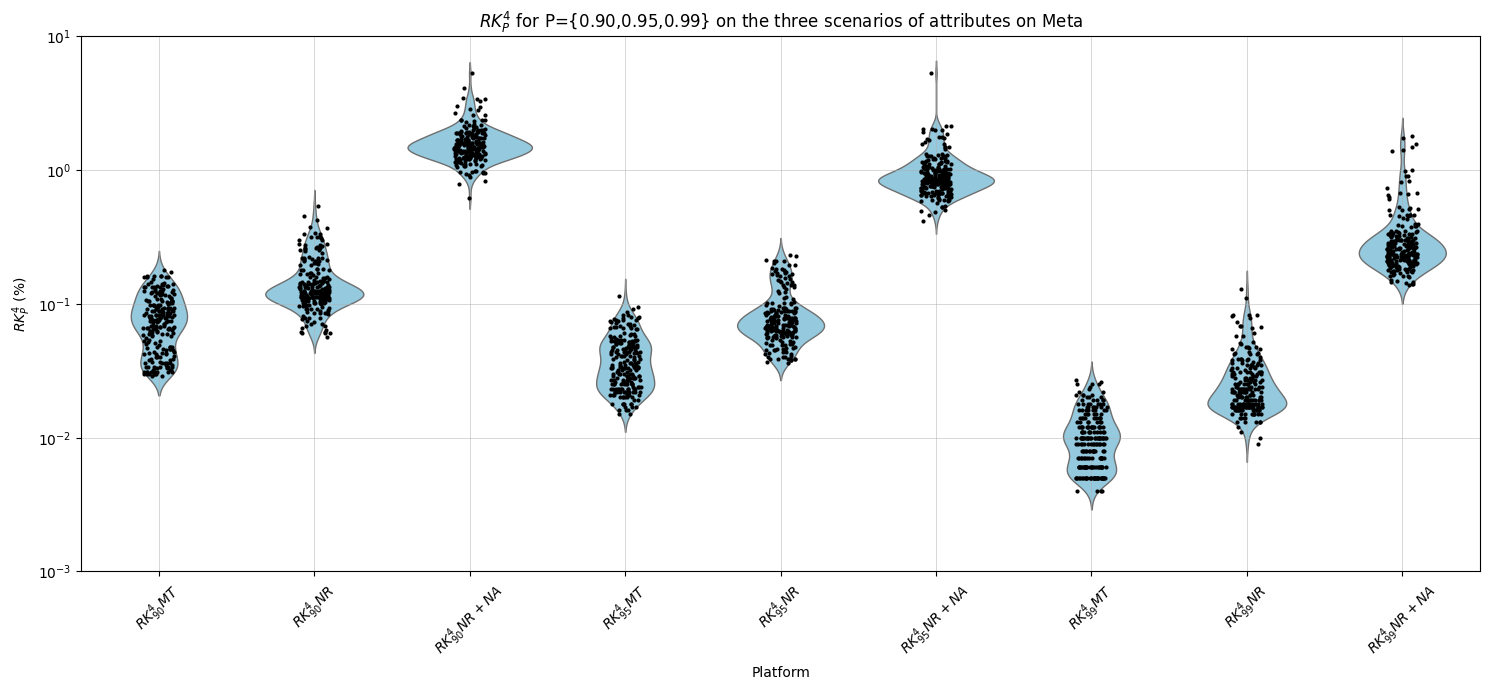

In [40]:
columns =  [r'$RK^4_{90} MT$', r'$RK^4_{90} NR$', r'$RK^4_{90} NR+NA$',
            r'$RK^4_{95} MT$', r'$RK^4_{95} NR$', r'$RK^4_{95} NR+NA$',
            r'$RK^4_{99} MT$', r'$RK^4_{99} NR$', r'$RK^4_{99} NR+NA$'
            ]

data_melted = platforms_merged.melt(value_vars=columns, var_name='Platform', value_name='Value')


data_melted['LogValue'] = np.log10(data_melted['Value'])


plt.figure(figsize=(15, 7))
sns.violinplot(data=data_melted, x='Platform', y='LogValue', inner=None, color='skyblue', linewidth=1)
sns.stripplot(data=data_melted, x='Platform', y='LogValue', jitter=True, color='black', size=3)


log_ticks = np.arange(np.floor(data_melted['LogValue'].min()), 
                      np.ceil(data_melted['LogValue'].max()) + 1)
plt.yticks(log_ticks, [f"$10^{{{int(tick)}}}$" for tick in log_ticks])


plt.ylabel('$RK^4_{P}$ (%)')
plt.title('$RK^4_{P}$ for P={0.90,0.95,0.99} on the three scenarios of attributes on Meta')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)




plt.show()

In [41]:
desired_first = ['country']

new_column_order = desired_first + [col for col in platforms_merged.columns if col not in desired_first]

platforms_merged = platforms_merged[new_column_order]

platforms_merged = platforms_merged.sort_values(r'$K^4_{90} MT$', ascending=False).reset_index(drop=True)
platforms_merged = platforms_merged.loc[platforms_merged[r'$K^4_{90} MT$'] >= 1000].reset_index(drop=True)
platforms_merged

,country,$K^4_{90} MT$,$K^4_{90} NR$,$K^4_{90} NR+NA$,$K^4_{95} MT$,$K^4_{95} NR$,$K^4_{95} NR+NA$,$K^4_{99} MT$,$K^4_{99} NR$,$K^4_{99} NR+NA$,$RK^4_{90} MT$,$RK^4_{90} NR$,$RK^4_{90} NR+NA$,$RK^4_{95} MT$,$RK^4_{95} NR$,$RK^4_{95} NR+NA$,$RK^4_{99} MT$,$RK^4_{99} NR$,$RK^4_{99} NR+NA$
0,IN,636500,662400,8800000,319400,372900,3700000,46900,92900,889900,0.159,0.155,2.063,0.080,0.087,0.867,0.012,0.022,0.209
1,US,183400,231600,2400000,88900,140400,1600000,9800,51900,556800,0.109,0.134,1.403,0.053,0.081,0.935,0.006,0.030,0.325
2,BR,162200,174900,1900000,84800,113700,1400000,7700,34600,380700,0.135,0.144,1.558,0.071,0.094,1.148,0.006,0.028,0.312
3,ID,139400,213800,1600000,55300,120300,1100000,8400,31100,381500,0.111,0.159,1.196,0.044,0.089,0.823,0.007,0.023,0.285
4,VN,121700,141000,1600000,39100,65900,830600,4900,11400,182400,0.160,0.182,2.081,0.051,0.085,1.080,0.006,0.015,0.237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,HT,1200,3800,42200,989,1300,18500,497,664,7000,0.042,0.130,1.479,0.034,0.045,0.648,0.017,0.023,0.245
99,CR,1200,4100,57800,989,2400,34300,713,989,9400,0.034,0.117,1.673,0.028,0.069,0.993,0.020,0.028,0.272
100,FI,1200,1900,23000,989,1400,16800,599,887,9500,0.050,0.090,1.106,0.041,0.067,0.808,0.025,0.042,0.457
101,IE,1100,2600,35400,989,1400,19600,498,855,6000,0.039,0.106,1.465,0.035,0.057,0.811,0.018,0.035,0.248


In [42]:
countries_ocde_a2 = pd.DataFrame(pd.DataFrame(ocde,columns=['country'])['country'].apply(lambda x: pycountry.countries.lookup(x).alpha_2))

df_ocde = platforms_merged[platforms_merged['country'].isin(countries_ocde_a2['country'])].copy()



df_ocde_pivot_countries = df_ocde.pivot_table(index='country', values=[r'$RK^4_{90} MT$', r'$RK^4_{90} NR$', r'$RK^4_{90} NR+NA$']).T
df_ocde_pivot_platforms= df_ocde[[r'$RK^4_{90} MT$', r'$RK^4_{90} NR$', r'$RK^4_{90} NR+NA$']]
correlation_matrix = df_ocde_pivot_platforms.corr(method='spearman')

correlation_matrix

,$RK^4_{90} MT$,$RK^4_{90} NR$,$RK^4_{90} NR+NA$
$RK^4_{90} MT$,1.000000,0.629959,0.188420
$RK^4_{90} NR$,0.629959,1.000000,0.566125
$RK^4_{90} NR+NA$,0.188420,0.566125,1.000000


In [43]:
latex_table=df_ocde.sort_values(r'$RK^4_{99} MT$', ascending=True)[['country',r'$RK^4_{99} MT$', r'$RK^4_{99} NR$', r'$RK^4_{99} NR+NA$']].to_latex(index=False,float_format="%.4f",escape=False)
print(latex_table)

\begin{tabular}{lrrr}
\toprule
country & $RK^4_{99} MT$ & $RK^4_{99} NR$ & $RK^4_{99} NR+NA$ \\
\midrule
MX & 0.0050 & 0.0230 & 0.2260 \\
TR & 0.0050 & 0.0200 & 0.2950 \\
GB & 0.0050 & 0.0310 & 0.5090 \\
FR & 0.0050 & 0.0330 & 0.3440 \\
CO & 0.0050 & 0.0250 & 0.3070 \\
DE & 0.0050 & 0.0300 & 0.3380 \\
JP & 0.0050 & 0.0180 & 0.2010 \\
ES & 0.0050 & 0.0240 & 0.2760 \\
IT & 0.0050 & 0.0330 & 0.2690 \\
CA & 0.0050 & 0.0350 & 0.5260 \\
PL & 0.0050 & 0.0250 & 0.2770 \\
US & 0.0060 & 0.0300 & 0.3250 \\
AU & 0.0060 & 0.0310 & 0.3840 \\
CL & 0.0070 & 0.0280 & 0.2350 \\
KR & 0.0080 & 0.0180 & 0.2590 \\
NL & 0.0100 & 0.0240 & 0.2820 \\
BE & 0.0120 & 0.0250 & 0.4330 \\
PT & 0.0120 & 0.0170 & 0.2140 \\
GR & 0.0130 & 0.0200 & 0.1900 \\
CZ & 0.0140 & 0.0210 & 0.2900 \\
IL & 0.0140 & 0.0210 & 0.2120 \\
HU & 0.0160 & 0.0240 & 0.4590 \\
CH & 0.0170 & 0.0290 & 0.3010 \\
SE & 0.0180 & 0.0390 & 0.3310 \\
IE & 0.0180 & 0.0350 & 0.2480 \\
AT & 0.0190 & 0.0310 & 0.3270 \\
CR & 0.0200 & 0.0280 & 0.2720 \\
NZ &

/var/folders/z5/ytx34jnj6rq1pmddzy83mx3w0000gn/T/ipykernel_30014/3506971996.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


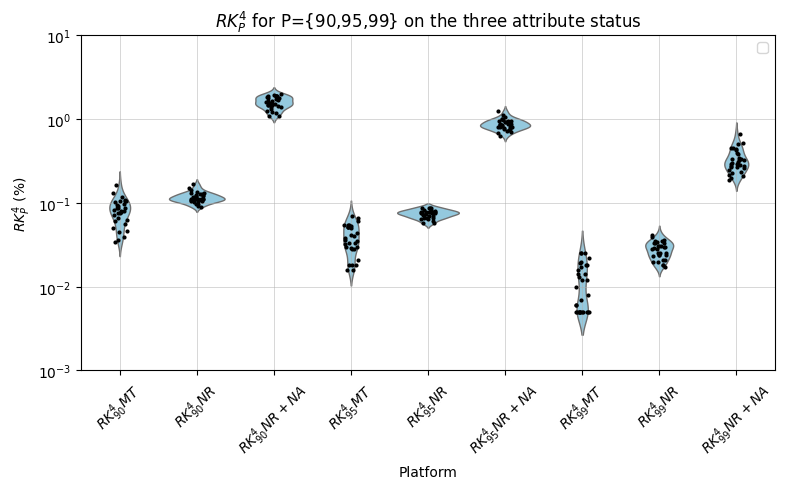

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


columns =  [r'$RK^4_{90} MT$', r'$RK^4_{90} NR$', r'$RK^4_{90} NR+NA$',
            r'$RK^4_{95} MT$', r'$RK^4_{95} NR$', r'$RK^4_{95} NR+NA$',
            r'$RK^4_{99} MT$', r'$RK^4_{99} NR$', r'$RK^4_{99} NR+NA$'
            ]
data_melted = df_ocde.melt(value_vars=columns, var_name='Platform', value_name='Value')


data_melted['LogValue'] = np.log10(data_melted['Value'])


median_values = data_melted.groupby('Platform')['LogValue'].median()


plt.figure(figsize=(8, 5))


sns.violinplot(data=data_melted, x='Platform', y='LogValue', inner=None, color='skyblue', linewidth=1)


sns.stripplot(data=data_melted, x='Platform', y='LogValue', jitter=True, color='black', size=3)



log_ticks = np.arange(np.floor(data_melted['LogValue'].min()), 
                      np.ceil(data_melted['LogValue'].max()) + 1)
plt.yticks(log_ticks, [f"$10^{{{int(tick)}}}$" for tick in log_ticks])


plt.ylabel('$RK^4_{P}$ (%)')
plt.title('$RK^4_{P}$ for P={90,95,99} on the three attribute status')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)


plt.legend(loc='upper right')


plt.savefig("Figure_3.png", dpi=300, bbox_inches='tight')
plt.show()

In [45]:
df_ocde_partial = df_ocde[[r'$RK^4_{90} MT$', r'$RK^4_{90} NR$', r'$RK^4_{90} NR+NA$','country']]
df_ocde_partial = df_ocde_partial.assign(**{'increment-MT-NR': df_ocde_partial[r'$RK^4_{90} NR$'] / df_ocde_partial[r'$RK^4_{90} MT$']})
df_ocde_partial['increment-MT-NR+NA'] = df_ocde_partial[r'$RK^4_{90} NR+NA$'] / df_ocde_partial[r'$RK^4_{90} NR$']

In [46]:
print(df_ocde_partial['increment-MT-NR'].min(),df_ocde_partial['increment-MT-NR'].max(),df_ocde_partial['increment-MT-NR'].mean(),df_ocde_partial['increment-MT-NR'].median(), df_ocde_partial['increment-MT-NR'].std())
print(df_ocde_partial['increment-MT-NR+NA'].min(),df_ocde_partial['increment-MT-NR+NA'].max(),df_ocde_partial['increment-MT-NR+NA'].mean(),df_ocde_partial['increment-MT-NR+NA'].median(),df_ocde_partial['increment-MT-NR+NA'].std())
df_ocde_partial

1.0245398773006136 3.441176470588235 1.6036107555362498 1.3521126760563382 0.5800943089064585
10.470149253731343 17.366071428571427 13.616432518971964 13.781818181818181 1.9321525688204135


,$RK^4_{90} MT$,$RK^4_{90} NR$,$RK^4_{90} NR+NA$,country,increment-MT-NR,increment-MT-NR+NA
1,0.109,0.134,1.403,US,1.229358,10.470149
6,0.105,0.127,1.808,MX,1.209524,14.236220
10,0.163,0.167,2.019,TR,1.024540,12.089820
12,0.098,0.112,1.319,GB,1.142857,11.776786
14,0.105,0.124,1.473,FR,1.180952,11.879032
16,0.082,0.109,1.521,CO,1.329268,13.954128
20,0.102,0.117,1.878,DE,1.147059,16.051282
23,0.117,0.132,1.869,JP,1.128205,14.159091
24,0.105,0.129,1.579,ES,1.228571,12.240310
25,0.080,0.098,1.095,IT,1.225000,11.173469
